 # Homework 10 Spectral
 ### ATSC 507
 ##### Christopher Rodell
 $$
 \\
 $$
 ### Question 1
 Given the polynomial
 $$
 y = 0.5*x + x*sin(\frac{2* \pi *x}{10}) \hspace{16mm} \text{for: } 0 ≤ x ≤ 20
 $$
   - (a) plot this function

******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/e1167f98-a384-43e9-b48e-3c7bd59e757c
******************************

through /Users/rodell/atsc507/py/hw10/context.py -- pha
through /Users/rodell/atsc507/cr507/__init__.py pha II


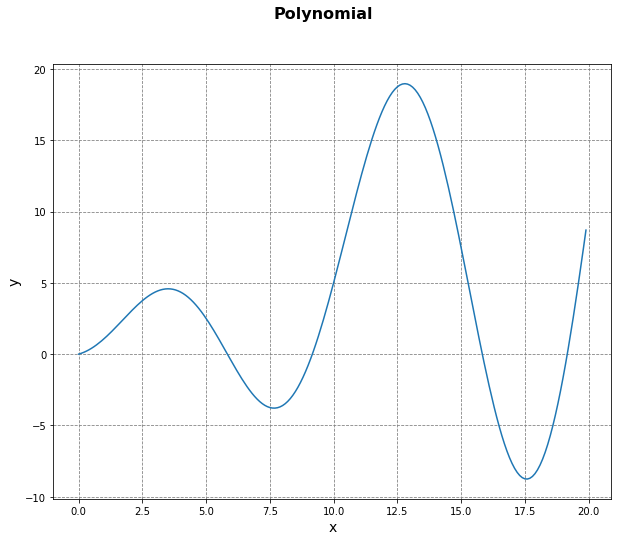

In [1]:
import context
import numpy as np 
import matplotlib.pyplot as plt
from cr507.utils import plt_set


x = np.arange(0.,20,0.1)
y = 0.5 * x + x * np.sin((2 *np.pi * x)/ 10)


fig, ax = plt.subplots(1,1, figsize=(10,8))
fig.suptitle('Polynomial', fontsize= plt_set.title_size, fontweight="bold")
ax.plot(x,y)
ax.set_xlabel('x', fontsize = plt_set.label)
ax.set_ylabel('y', fontsize = plt_set.label)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
# ax.legend()

# plt.show()


 ### Question 1 cont.
   - (b) analytically integrate it, to find the exact solution.
 $$
 f(x)=\int_{0}^{20} \frac{x}{2} d x+\int_{0}^{20} x \sin \left(\frac{\pi x}{5}\right) d x
 $$
 $$
 \\
 $$
 Let:
 $$
 \begin{array}{l}u=x \quad v=\frac{5}{\pi} \cos \left(\frac{\pi x}{5}\right) \\ d u=1 \quad d v=\sin \left(\frac{\pi x}{5}\right)\end{array}
 $$
 $$
 \\
 $$
 $$
 f(x)=\biggr|_{0} ^{20} \frac{x^{2}}{4}-x \frac{5}{\pi} \cos \biggr(\frac{\pi x}{5}\biggr)-\biggr(-\frac{5}{\pi}\biggr) \int_{0}^{20} \cos \biggr(\frac{\pi x}{5}\biggr) d x
 $$
 $$
 f(x)=\biggr|_{0} ^{20} \frac{x^{2}}{4}- \frac{5x}{\pi} \cos \biggr(\frac{\pi x}{5}\biggr)+ \frac{25}{\pi^{2}} \sin \biggr(\frac{\pi x}{5}\biggr)
 $$
 $$
 \\
 $$
 $$
 \\
 $$
 $$
 f(x)= f(20) - f(0)
 $$
 $$
 \begin{aligned}f(x)=\biggr[\frac{20^{2}}{4}- \frac{5*20}{\pi} \cos \biggr(\frac{\pi *20}{5}\biggr)+ \frac{25}{\pi^{2}} \sin \biggr(\frac{\pi *20}{5}\biggr)\biggr] \\ - \biggr[\frac{0^{2}}{4}- \frac{5*0}{\pi} \cos \biggr(\frac{\pi *0}{5}\biggr)+ \frac{25}{\pi^{2}} \sin \biggr(\frac{\pi *0}{5}\biggr)\biggr]\end{aligned}
 $$

 $$
 \boxed{f(x) = 68.169}
 $$

 ### Question 1 cont-
 - (c) Use Gauss quadrature to numerically integrate it (using the eqs and tables in the handout,
  not any built-in integration function) for the following number of key points (m or n=):
  (i) 2 ,  (ii) 4 , (iii) 6 , (iv) 8 , and discuss how Gaussian quadrature converges to the
  exact solution.  Show your work on your spreadsheet, or matlab, or your computer program.
 I
 $$
 \text {Use Gauss-Legendre quadrature:}
 $$
 $$
 \bar{I}=\frac{b-a}{2} \sum_{k=1}^{m} w_{k} f\left(x_{k}\right) \hspace{4mm} \text {to evaluate integral:} \hspace{4mm} I=\int_{a}^{b} f(x) d x
 $$
 $$
 \text {First transform}
 $$
 $$
 \mathrm{-1}\leqslant \xi \leqslant \mathbf{1} \hspace{4mm}\text {onto}\hspace{4mm} \mathrm{a} \leqslant x \leqslant \mathrm{b}
 $$
 $$
 \text {by}
 $$
 $$
 x=\frac{b+a}{2}+\frac{b-a}{2} \xi
 $$
 $$
 \text {Use Table A-1 Zeros and Weights for Gauss-Legendre Quadrature }
 $$
 $$
 \begin{array}{|c|c|c|}\hline m & \pm \xi_{k} & w_{k} \\ \hline 2 & 0.5773502692
  & 1.0000000000 \\ \hline 4 & 0.3399810436 & 0.6521451549 \\ & 0.8611363116
 & 0.3478548451 \\ \hline 6 & 0.2386191861 & 0.4679139346 \\ & 0.6612093865
 & 0.3607615730 \\ & 0.9324695142 & 0.1713244924 \\ \hline & 0.1834346425
 & 0.3626837834 \\ 8 & 0.5255324099 & 0.3137066459 \\ & 0.7966664774
 & 0.2223810345 \\ & 0.9602898565 & 0.1012285363 \\ \hline\end{array}
 $$

In [2]:

def guass(table):
    t = table
    a, b = 0, 20
    I_bar = []
    for i in range(len(t["Xi"])):
        x_p = (b + a)/2 + ((b - a)/2)*t["Xi"][i]
        fx_p = (0.5 * x_p) + x_p * np.sin((2 * np.pi * x_p)/ 10)
        I_p = fx_p * t["w"][i]

        x_n = (b + a)/2 + (((b - a)/2)* -t["Xi"][i])
        fx_n = (0.5 * x_n) + x_n * np.sin((2 * np.pi * x_n)/ 10)
        I_n = fx_n * t["w"][i]

        I_bar.append(I_p)
        I_bar.append(I_n)
    I_bar = np.array(I_bar)
    # print(I_bar)
    I_bar = ((b - a)/2) * np.sum(I_bar)
    return I_bar

m = ["m2", "m4", "m6", "m8"]
table = {"m2": {"Xi": [0.5773502692], 
            "w": [1.0000000000]},
        "m4": {"Xi": [0.3399810436, 0.8611363116], 
            "w": [0.6521451549, 0.3478548451]},
        "m6": {"Xi": [0.2386191861, 0.6612093865, 0.9324695142], 
            "w": [0.4679139346, 0.3607615730, 0.1713244924]},
         "m8": {"Xi": [0.1834346425, 0.5255324099, 0.7966664774, 0.9602898565],  
            "w": [0.3626837834, 0.3137066459, 0.2223810345, 0.1012285363]}}

I_bar_all = {}
for i in range(len(m)):
    I_bar = guass(table[m[i]])
    I_bar_all.update({m[i]: I_bar})

print("Gauss quadrature:  ", I_bar_all)


Gauss quadrature:   {'m2': 46.06414885515778, 'm4': 91.5555074549653, 'm6': 68.64561697413993, 'm8': 68.17079611506696}


 ##### *Answer 1C*
 **The Gauss-Legendre quadrature was remarkably accurate at with 8 points.
  In general, the more point used the more accurate the method
   becomes to the analytical solution. However, for a very large
   number of points run off errors, can cause a significant
   deterioration in accuracy.**

 ### Question 2
 Search the internet fo find the type of truncation and its
  highest order M used for operational runs of (a)  ECMWF.
   Relate these to Warner's L1-L4 on p49.
 $$
 \\
 $$
 *The table below shows the correspondence between spectral, Gaussian and
 latitude/longitude resolution for some ECMWF products.*
 $$
 \begin{array}{|l|l|l|}\hline \text { Gaussian number (N) } & \text
 { Spectral truncation (T) } & \text { Approximate resolution in degrees }^{1}
 \\ \hline \text { N48 } & \text { T63 } & 1.875 \\ \hline \text { N80 } &
 \text { T159 } & 1.125 \\ \hline \text { N128 } & \text { T255 } & 0.75
 \\ \hline \text { N160 } & \text { T319 } & 0.5625 \\ \hline \text
 { N256 } & \text { T511 } & 0.351 \\ \hline \text { N320 } & \text
 { T639 } & 0.28125 \\ \hline \text { N400 } & \text { T799 } & 0.225
 \\ \hline \text { N640 } & \text { T1279 } & 0.14 \\ \hline \text { N1024 } & \text { T2047 } & 0.088 \\ \hline\end{array}
 $$
 *https://confluence.ecmwf.int/display/UDOC/What+is+the+connection+between+the+spectral+truncation+and+the+Gaussian+grids+-+Metview+FAQ*
 $$
 \\
 $$
 ##### *Answer Q2*
 **The ECMWF IFS model uses a spherical harmonic expansion of fields,
 truncated at a particular wavenumber. The largest spectral truncation
 occurs near the poles at an M = 1024. This is a much large M value or
 truncation value T2047 than Warren mentions. The spectral resolutions
 Warren mentions are much more coarse than what the ECMWF uses for
 its operational global forecast model.**

 ### Question 3
 Plot eq. (4.22) of Coiffier similar to his Fig 4.2,
 but for:  (a) m=0 with n=1 to 4, (b) m=1 with n=1 to5,
 and (c) m=2 with n=2 to 6.
 $$
 \\
 $$
 $$
 P_{n}^{m}(\mu)=\sqrt{(2 n+1) \frac{(n-m) !}{(n+m) !}}
 \frac{\left(1-\mu^{2}\right)^{\frac{m}{2}}}{2^{n} n !}
 \frac{d^{n+m}}{d \mu^{n+m}}\left(\mu^{2}-1\right)^{n}
 \hspace{14mm} \text{(Coiffier eq. 4.22)}
 $$

In [3]:
from sympy import *
from sympy.abc import x, mu
from scipy.special import factorial
from sympy.plotting import plot

m = ["m0", "m1", "m2"]
dictionary = {"m0": {"m": 0, "n": np.arange(1,5,1)},
              "m1": {"m": 1, "n": np.arange(1,6,1)},
              "m2": {"m": 2, "n": np.arange(2,7,1)}}


def derivatives(n,m):         
    P = ((mu**2) - 1)**n
    Pprime = diff(P, mu,(m + n))
    k2 = Pprime * (1 - mu**2)**(m/2)
    return k2

def legendre(dictionary):
    d = dictionary
    m = d["m"] 
    P_list = []
    for i in range(len(d["n"])):
        n = d["n"] 
        k1 = ((2*n[i] + 1) * (factorial(n[i] - m)/factorial(n[i] + m)))**(1/2) * (1 / (2**n[i] * factorial(n[i])))
        k2 = derivatives(n[i],m)
        P = k1*k2
        P_list.append(P)
    return P_list


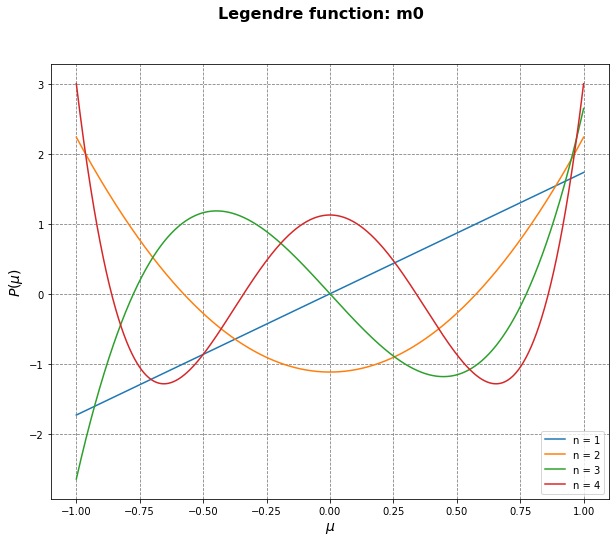

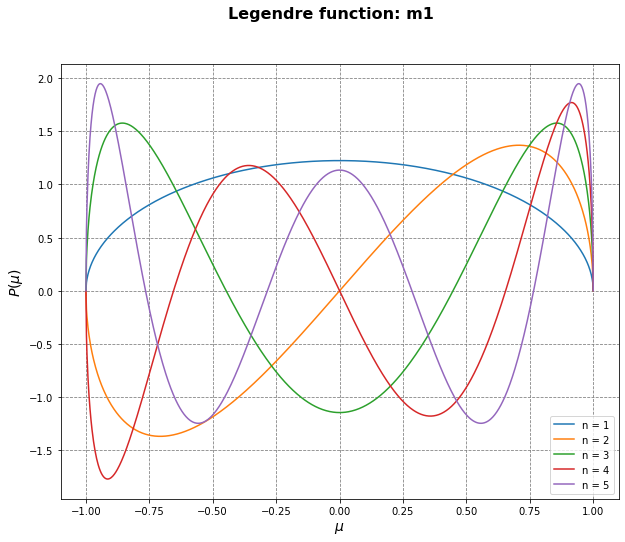

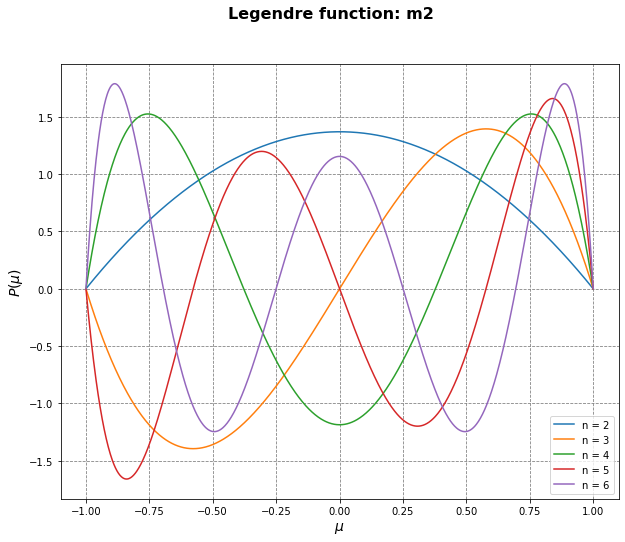

In [4]:

m0 = legendre(dictionary["m0"])
m1 = legendre(dictionary["m1"])
m2 = legendre(dictionary["m2"])

fig, ax = plt.subplots(1,1, figsize=(10,8))
fig.suptitle('Legendre function: m0', fontsize= plt_set.title_size, fontweight="bold")
ax.set_xlabel('$\mu$', fontsize = plt_set.label)
ax.set_ylabel('$P(\mu)$', fontsize = plt_set.label)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
for i in range(len(m0)):
    lam_x = lambdify(mu, m0[i], modules=['numpy'])
    x_vals = np.linspace(-1, 1, 1000)
    y_vals = lam_x(x_vals)
    ax.plot(x_vals, y_vals, label = "n = " + str(dictionary["m0"]["n"][i]))
    ax.legend()



fig, ax = plt.subplots(1,1, figsize=(10,8))
fig.suptitle('Legendre function: m1', fontsize= plt_set.title_size, fontweight="bold")
ax.set_xlabel('$\mu$', fontsize = plt_set.label)
ax.set_ylabel('$P(\mu)$', fontsize = plt_set.label)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
for i in range(len(m1)):
    lam_x = lambdify(mu, m1[i], modules=['numpy'])
    x_vals = np.linspace(-1, 1, 1000)
    y_vals = lam_x(x_vals)
    ax.plot(x_vals, y_vals, label = "n = " + str(dictionary["m1"]["n"][i]))
    ax.legend()



fig, ax = plt.subplots(1,1, figsize=(10,8))
fig.suptitle('Legendre function: m2', fontsize= plt_set.title_size, fontweight="bold")
ax.set_xlabel('$\mu$', fontsize = plt_set.label)
ax.set_ylabel('$P(\mu)$', fontsize = plt_set.label)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
for i in range(len(m2)):
    lam_x = lambdify(mu, m2[i], modules=['numpy'])
    x_vals = np.linspace(-1, 1, 1000)
    y_vals = lam_x(x_vals)
    ax.plot(x_vals, y_vals, label = "n = " + str(dictionary["m2"]["n"][i]))
    ax.legend()

plt.show()

 ### Question 4
 Use Fourier methods similar to the class demo, so you can derive
 the Ordinary Differential Eq (ODE) for:
 $$
 \\
 $$
 $$
 \partial \mathrm{T} / \partial \mathrm{t}+\mathrm{U_{o}}
   \partial \mathrm{T} / \partial \mathrm{x}=\mathrm{K}
  \partial^{2} \mathrm{T} / \partial \mathrm{x}^{2} \hspace{10mm} \text{Uo and K are constants}
 $$
 $$
 \\
 $$
 $$
 \\
 $$

 ##### *Answer Q4*
 $$
 \partial \mathrm{T} / \partial \mathrm{t}+\mathrm{U_{o}}  \partial \mathrm{T} / \partial \mathrm{x}=\mathrm{K} \partial^{2} \mathrm{T} / \partial \mathrm{x}^{2} \hspace{10mm} (1)
 $$
 $$
 T(x, t)=\sum_{m} C_{m}(t) e^{i m k x} \hspace{26mm} (2)
 $$
 $$
 \text{Plug (2) into (1)}
 $$
 $$
 \sum_{m}\left[e^{i m k x} \frac{\partial C_{m}}{\partial t}\right] + U_{o}\sum_{m}\left[C_{m} \frac{\partial e^{i m k x}}{\partial x}\right] =
 K\sum_{m}\left[C_{m} \frac{\partial^2 e^{i m k x}}{\partial x^2}\right]
 $$
 $$
 \frac{\partial e^{i m k x}}{\partial x} = imk(-e^{i m k x})
  \hspace{1cm} \text{&}  \hspace{1cm}\frac{\partial^2 e^{i m k x}}{\partial x^2} = k^2m^2(-e^{i m k x})
 $$
 $$
 \sum_{m}\biggr[e^{i m k x} \biggr( \frac{\partial C_{m}}{\partial t} +
 imkU_{o}C_{m} + k^2m^2KC_{m}\biggr)\biggr] = 0
 $$
 $$
 \text{This requires...}
 $$
 $$
 \frac{\partial C_{m}}{\partial t} +
 imkU_{o}C_{m} + k^2m^2KC_{m} = 0 \hspace{1cm} \text{for each m}
 $$
 $$
 \frac{\partial C_{m}}{C_{m}} = (-imkU_{o} - k^2m^2K)\partial t
 $$
 $$
 \int_{C_m^(t=0)}^{C_m} \frac{\partial C_m^{'}}{C_m^{'}} = (-imkU_{o} - k^2m^2K) \int_{0}^{t}\partial t^{'}
 $$
 $$
 \ln (C_m^{'})\biggr|_{C_m(0)} ^{C_m}= (-imkU_{o} - k^2m^2K) t
 $$
 $$
 \ln \biggr(\frac{C_m}{C_m(0)}\biggr)= (-imkU_{o} - k^2m^2K) t
 $$
 $$
 \frac{C_m}{C_m(0)}= e^{(-imkU_{o} - k^2m^2K) t}
 $$
 $$
 \text{or}
 $$
 $$
 \boxed{C_m(t)= C_m(t-\Delta t)e^{(-imkU_{o} - k^2m^2K) \Delta t}}
 $$